###  **Adding Noise to Image data for Deep learning Data Augmentation**

![](https://pbblogassets.s3.amazonaws.com/uploads/2018/08/27203831/Periodic-interference.jpg)  

**What is Image Noise?**
---
> **Image noise** is random variation of brightness or color information in images, and is usually an aspect of electronic noise.   
> ..._wikipedia_
* It can be produced by the image sensor and circuitry of a scanner or digital camera. 
* Image noise can also originate in film grain and in the unavoidable shot noise of an ideal photon detector. 
* Image noise is an undesirable by-product of image capture that obscures the desired information.
* The original meaning of "noise" was "unwanted signal"; unwanted electrical fluctuations in signals received by AM radios caused audible acoustic noise ("static"). By analogy, unwanted electrical fluctuations are also called "noise".
* Image noise can range from almost imperceptible specks on a digital photograph taken in good light, to optical and radioastronomical images that are almost entirely noise, from which a small amount of information can be derived by sophisticated processing. Such a noise level would be unacceptable in a photograph since it would be impossible even to determine the subject.
* Noise can reduce the accuracy of neural network.
* Noise can lead to less generalization power when testing on real-world data.

**Effect of Noise**
---
Real world data is rarely clean. This is not always what is expected to train deep learning models. This is one of the reasons for the malfunction of the neural network. It continues to be the case until we discover a better method to utilise the noise in the data. What if we could utilise noise to data augmentation in deep learning?

**Noise We used in this Notebook**
---
* Gaussian Noise
* Salt and Paper Noise
* Speckle Noise


**1.Import the Libraries**
---

In [1]:
# torch loaded...!!!
import torch
from torch.utils.data import DataLoader

# torchvision loaded...!!!
from torchvision.utils import save_image
from torchvision import datasets
import torchvision.transforms as transforms

# other  libraries...!!!
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import argparse
from skimage.util import random_noise

Some of the important ones are:

* `datasets`: this will provide us with the PyTorch datasets like MNIST, FashionMNIST, and CIFAR10.
* `DataLoader`: we will use this to make iterable data loaders to read the data.
* `random_noise`: we will use the random_noise module from skimage library to add noise to our image data.
* `save_image`: PyTorch provides this utility to easily save tensor data as images.
* `transforms`: helps us with the preprocessing and transformations of the images.
* `argparse`: to read the input from the command line and parse it.

**2.Define the Batchsize**
---

In [2]:
dataset = 'mnist'
BATCH_SIZE = 4

**3. Preparing the Dataset and DataLoader**
---

In [3]:
dataset = 'mnist'
if dataset == 'mnist':
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5,))])
    trainset = datasets.MNIST('../data',train=True, download=True, transform=transform)
    test = datasets.MNIST('../data',train=False, download=True, transform=transform)
elif dataset == 'fashionmnist':
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5,))])
    trainset = datasets.FashionMNIST('../data',train=True, download=True, transform=transform)
    test = datasets.FashionMNIST('../data',train=False, download=True, transform=transform)
else:
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),])
    trainset = datasets.CIFAR10('../data',train=True, download=True, transform=transform)
    test = datasets.CIFAR10('../data',train=False, download=True, transform=transform)

C:\Users\SHIVA\miniconda3\envs\pytorch19\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


**4. Data Loader**
---

In [4]:
trainLoader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
testLoader = DataLoader(test, batch_size=BATCH_SIZE, shuffle=True)

**5.Save Noisy Image**
---

In [5]:
def save_noisy_image(img, name):
    if img.size(1) == 3:
        img = img.view(img.size(0), 3, 32, 32)
        save_image(img, name)
    else:
        img = img.view(img.size(0), 1, 28, 28)
        save_image(img, name)

**6. Adding Noise to Image Data**
---

### **1.Gaussian Noise :**

* First, we iterate through the data loader and load a batch of images (lines 2 and 3). Note that we do not need the labels for adding noise to the data. However, in case you need to simultaneously train a neural network as well, then you will have to load the labels.
* At line 4 we add Gaussian noise to our img tensor. For that we need to convert all of the data into a torch tensor using torch.tensor(). For adding Gaussian noise we need to provide mode as gaussian with a mean of 0 and var (variance) of 0.05. We also clip the values by giving clip=True. It is important to clip the values of the resulting gauss_img tensor. This will make all the values between 0.0 and 1.0 avoiding all weird artifacts in the images.
* Finally, we save the image at line 5 by calling the save_noisy_img() function and passing the noisy image and name as the arguments. The name string is based on the dataset that we are using which we extract from the argument parser. We break after one iteration but you can continue if you want. You can save the noisy images as a DataFrame for later use as well.

In [24]:
def gaussian_noise():
    for data in trainLoader:
        img, _ = data[0], data[1]
        gauss_img = torch.tensor(random_noise(img, mode='gaussian', mean=0, var=0.05, clip=True))
        save_noisy_image(gauss_img, r"D:\ashishpatel26_github\Pytorch Learning\Noise_image\{dataset}_gaussian.png")        
        break

### **2. Salt and Paper Noise**

* We need to change the mode argument to s&p for adding salt & pepper noise. The salt_vs_pepper argument value is 0.5. This means that the ratio of the salt to pepper noise is going to be equal. All the other steps are going to the same as above.

In [25]:
def salt_paper_noise():
    for data in trainLoader:
        img, _ = data[0], data[1]
        salt_img = torch.tensor(random_noise(img, mode='salt', amount=0.05))
        save_noisy_image(salt_img, r"D:\ashishpatel26_github\Pytorch Learning\Noise_image\{dataset}_salt.png")
        break

### **3.Sparkle Noise**

In [26]:
def speckle_noise():
    for data in trainLoader:
        img, _ = data[0], data[1]
        speckle_img = torch.tensor(random_noise(img, mode='speckle', mean=0, var=0.05, clip=True))
        save_noisy_image(speckle_img, r"D:\ashishpatel26_github\Pytorch Learning\Noise_image\{dataset}_speckle.png")
        break

In [27]:
gaussian_noise()
salt_paper_noise()
speckle_noise()

**7. Display the generated Result**
---

In [37]:
import glob
glob.glob("Noise_image/*")

['Noise_image\\{dataset}_gaussian.png',
 'Noise_image\\{dataset}_salt.png',
 'Noise_image\\{dataset}_speckle.png']

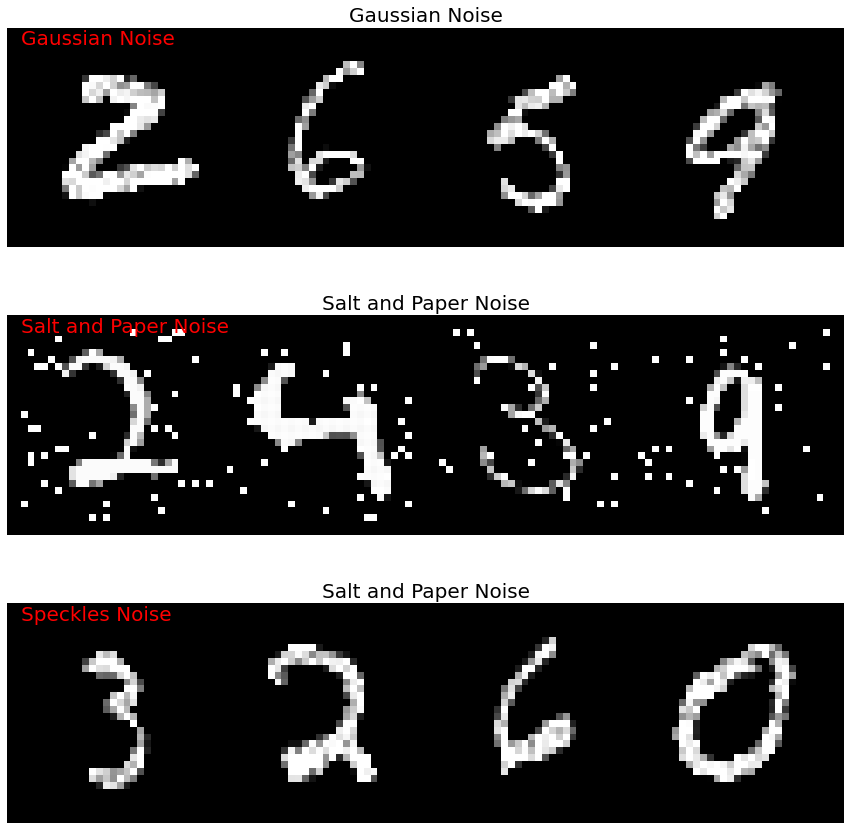

In [36]:
import cv2
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.imshow(cv2.imread(r"D:\ashishpatel26_github\Pytorch Learning\Noise_image\{dataset}_gaussian.png"))
plt.axis('off')
plt.title('Gaussian Noise', fontsize=20)
plt.text(1.5, 2, 'Gaussian Noise', fontsize=20, color='red')
plt.subplot(3,1,2)
plt.imshow(cv2.imread(r"D:\ashishpatel26_github\Pytorch Learning\Noise_image\{dataset}_salt.png"))
plt.axis('off')
plt.title('Salt and Paper Noise', fontsize=20)
plt.text(1.5, 2, 'Salt and Paper Noise', fontsize=20, color='red')
plt.subplot(3,1,3)
plt.imshow(cv2.imread(r"D:\ashishpatel26_github\Pytorch Learning\Noise_image\{dataset}_speckle.png"))
plt.axis('off')
plt.title('Salt and Paper Noise', fontsize=20)
plt.text(1.5, 2, 'Speckles Noise', fontsize=20, color='red')
plt.show()